# Multiple linear regression
In this Notebook, we'll be looking at _multiple linear regression_. Multiple linear regression is a linear model with multiple independent variables (predictors). We'll use an [IMDB (Internet movie database) data set on movies](https://www.kaggle.com/nielspace/imdb-data).

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('movie_data.csv') #This loads an object with many fields, including a description
df = df.dropna() #Let's get rid of rows with empty cells, because they will trip up a lot of the analyses
df.head()

title  action  comedy  drama  runtime  metascore  rating
0  Guardians of the Galaxy       1       0      0      121       76.0     8.1
1               Prometheus       0       0      0      124       65.0     7.0
2                    Split       0       0      0      117       62.0     7.3
3                     Sing       0       1      0      108       59.0     7.2
4            Suicide Squad       1       0      0      123       40.0     6.2

There are a number of variables, including a few so-called _dummy variables_ that indicate the genre of the movie with 0's and 1's (I left out many genres, so not all movies have a genre in this data set). Let's set ourselves the target of predicting the IMDB rating. Let's start with a scatterplot matrix.

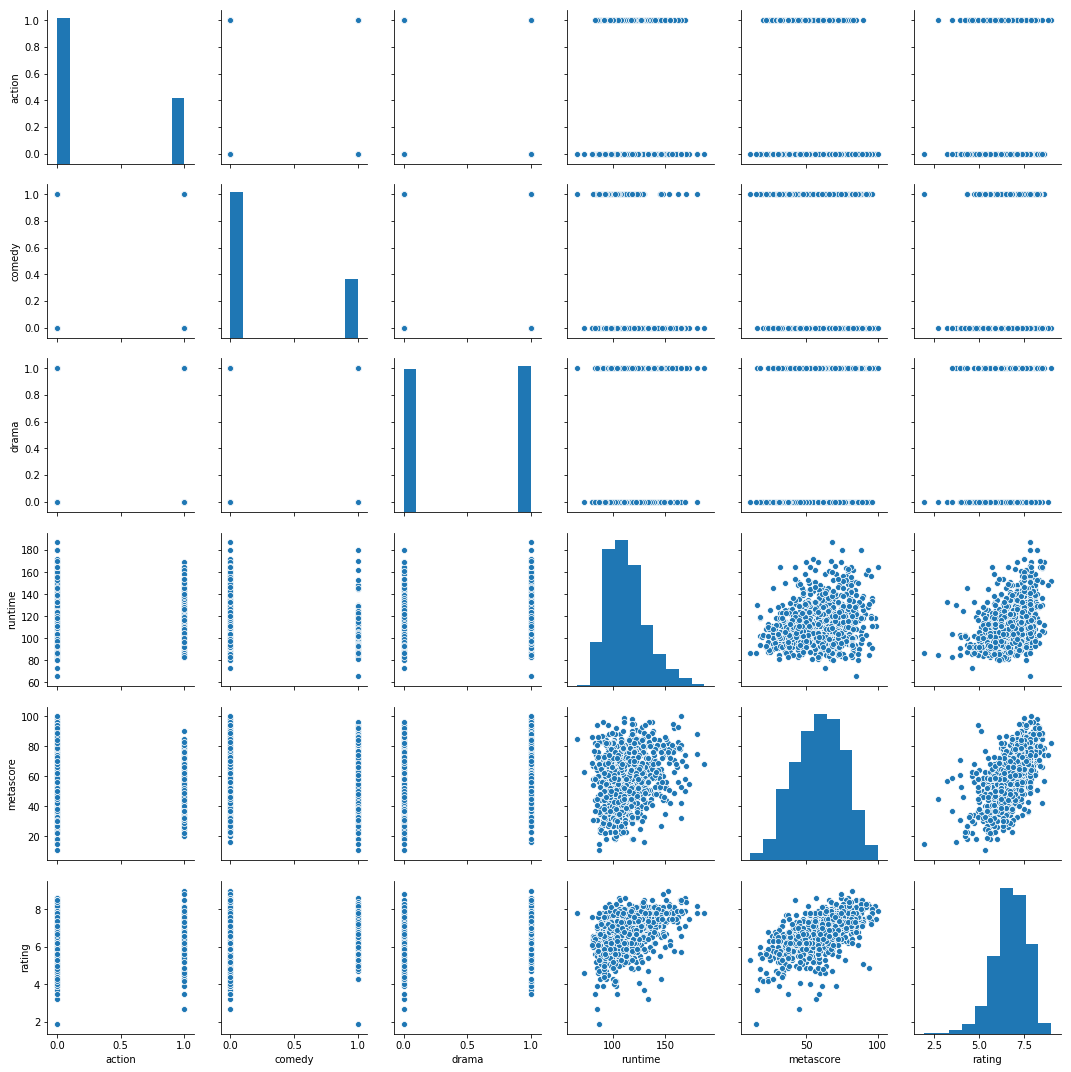

In [6]:
sns.pairplot(df)
plt.show()

Look at the final row, with 'rating' on the Y-axis. There are two variables that correlate strongly with rating, such as "runtime" and "metascore" (a score aggregated from professional reviews). The qualitative variables show a less clear picture. Let's put them all in a linear model. For sk-learn to work, we first need to create separate X and Y that include only the variables that we want to use.

In [7]:
y = df['rating'] #We need to take out the rating as our Y-variable
X = df.loc[:,'action':'metascore'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['title'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

action  comedy  drama  runtime  metascore
title                                                             
Guardians of the Galaxy       1       0      0      121       76.0
Prometheus                    0       0      0      124       65.0
Split                         0       0      0      117       62.0
Sing                          0       1      0      108       59.0
Suicide Squad                 1       0      0      123       40.0

We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [8]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

action  comedy  drama  runtime  metascore
title                                                         
We Are Your Friends       0       0      1       96       46.0
Joy                       0       0      1      124       56.0
Mother's Day              0       1      1      118       18.0
Man of Steel              1       0      0      143       55.0
Horrible Bosses 2         0       1      0      108       40.0

Now, let's train the linear model.

In [10]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's have a look at the coefficients.

In [11]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

0
0.130107     action
0.161977     comedy
0.161660      drama
0.012430    runtime
0.031486  metascore

We can interpret these coefficients as follows:

* The intercept makes no sense and does not need to be interpreted. Why not? Because it's the value when all X's are 0. So "runtime" is 0, which is impossible.
* If a movie is an action movie, it adds 0.13 to its rating
* If a movie is a comedy, it adds 0.16 to its rating
* If a movie is a drama, it adds 0.16 to its rating
* For each minute the rating increases with 0.012
* For each point on Metascore (0-100), the rating increases with 0.031

Finally, let's look at the model performance. We'll generate predictions and calculate the R^2 and RMSE.

**Remember that we are always looking at performance on the test data!**

In [12]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.43810051995698474

The R^2 is 0.46, which means 46% of the variation in movie scores is explained by the model. That's pretty good! Let's calculate the RMSE: the root mean squared error.

In [13]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.6923700650148937

The RMSE is 0.68. Which means that we are typically about 0.68 off in our predicted rating (which goes from 0-10). Finally, let's plot the predicted value against the actual rating.

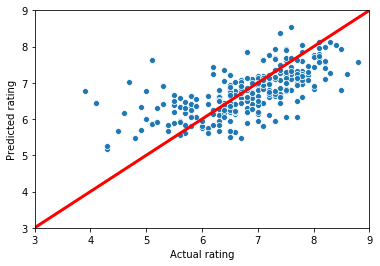

In [16]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are quite balanced. There are some really poor movies (score: 3-5.5) that we don't predict so well (the model predicts them too high: we can see that because they are plotted above the red line), but overall the model is doing a fine job.